# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url="http://api.openweathermap.org/data/2.5/weather"

city_name=[]
city_id=[]

for city in cities:
    try:
        parameters={"q":city,"units":"imperial","appid":weather_api_key}
        repo=requests.get(base_url,params=parameters).json()
        ids=repo["id"]
        name=repo["name"]
        city_name.append(name)
        city_id.append(ids)
        print("-------------------------------------------------")
        print(f"weather for city id:{ids}and cityname:{name}")
        print("-------------------------------------------------")
        pprint(repo)
        
        
    except KeyError:
        print("Missing Data")
        

-------------------------------------------------
weather for city id:5983720and cityname:Iqaluit
-------------------------------------------------
{'base': 'stations',
 'clouds': {'all': 56},
 'cod': 200,
 'coord': {'lat': 63.7506, 'lon': -68.5145},
 'dt': 1631858414,
 'id': 5983720,
 'main': {'feels_like': 24.73,
          'grnd_level': 1002,
          'humidity': 83,
          'pressure': 1008,
          'sea_level': 1008,
          'temp': 33.91,
          'temp_max': 33.91,
          'temp_min': 33.91},
 'name': 'Iqaluit',
 'sys': {'country': 'CA', 'sunrise': 1631873035, 'sunset': 1631919192},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 124, 'gust': 20.11, 'speed': 13.11}}
-------------------------------------------------
weather for city id:6201424and cityname:Mataura
-------------------------------------------------
{'base': 'stati

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_data=pd.DataFrame({"City":city_name,"Id":city_id})

city_data["country"]=""
city_data["lat"]=""
city_data["lng"]=""
city_data["Cloudiness"]=""
city_data["humidity"]=""
city_data["temperature"]=""
city_data["wind_speed"]=""


city_data.head()


,City,Id,country,lat,lng,Cloudiness,humidity,temperature,wind_speed
0,Iqaluit,5983720,,,,,,,
1,Mataura,6201424,,,,,,,
2,Nikolskoye,546105,,,,,,,
3,Cayenne,3382160,,,,,,,
4,Āsbe Teferī,343402,,,,,,,


In [7]:
for index,row in city_data.iterrows():
    try:
        parameters={"q":row["City"],"units":"imperial","appid":weather_api_key}
        repo=requests.get(base_url,params=parameters).json()
        
        city_data.loc[index,"country"]=repo["sys"]["country"]
        city_data.loc[index,"lat"]=repo["coord"]["lat"]
        city_data.loc[index,"lng"]=repo["coord"]["lon"]
        city_data.loc[index,"Cloudiness"]=repo["clouds"]["all"]
        city_data.loc[index,"humidity"]=repo["main"]["humidity"]
        city_data.loc[index,"temperature"]=repo["main"]["temp"]
        city_data.loc[index,"wind_speed"]=repo["wind"]["speed"]
        
    except KeyError:
        print("Missing Data")

city_data

,City,Id,country,lat,lng,Cloudiness,humidity,temperature,wind_speed
0,Iqaluit,5983720,CA,63.7506,-68.5145,49,81,34.05,14.14
1,Mataura,6201424,NZ,-46.1927,168.864,44,63,43.48,5.93
2,Nikolskoye,546105,RU,59.7035,30.7861,92,74,42.69,4.74
3,Cayenne,3382160,GF,4.9333,-52.3333,75,79,82.09,5.01
4,Āsbe Teferī,343402,ET,9.0833,40.8667,6,53,71.67,2.15
...,...,...,...,...,...,...,...,...,...
549,Forio,3176748,IT,40.7342,13.8646,38,86,72.41,11.12
550,Teseney,327651,ER,15.11,36.6575,79,60,81.46,6.91
551,Kattivākkam,1267433,IN,13.2167,80.3167,85,58,93.29,5.57
552,Manzini,934994,SZ,-26.25,31.5,100,70,59.41,9.64


In [8]:
city_data.to_csv("City_Data_Output.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
filt=city_data["humidity"]>100
city_data.drop(index=city_data[filt].index,inplace=True)
city_data.head()

,City,Id,country,lat,lng,Cloudiness,humidity,temperature,wind_speed
0,Iqaluit,5983720,CA,63.7506,-68.5145,49,81,34.05,14.14
1,Mataura,6201424,NZ,-46.1927,168.864,44,63,43.48,5.93
2,Nikolskoye,546105,RU,59.7035,30.7861,92,74,42.69,4.74
3,Cayenne,3382160,GF,4.9333,-52.3333,75,79,82.09,5.01
4,Āsbe Teferī,343402,ET,9.0833,40.8667,6,53,71.67,2.15


In [10]:
#  Get the indices of cities that have humidity over 100%.


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

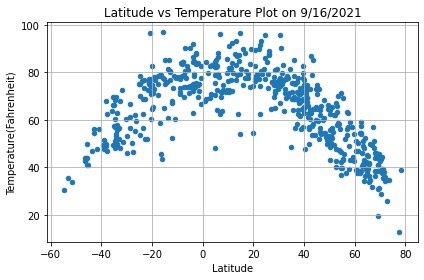

 Analisys: Temperature increases gradually towards equator.


In [12]:
city_data.plot(kind="scatter",x="lat",y="temperature",grid="True")
plt.title("Latitude vs Temperature Plot on 9/16/2021")
plt.xlabel("Latitude")
plt.ylabel("Temperature(Fahrenheit)")
plt.tight_layout()
plt.savefig("lat_vs_temp.png")
plt.show()

print("\u001b[32m Analisys: Temperature increases gradually towards equator.\u001b[0m")

## Latitude vs. Humidity Plot

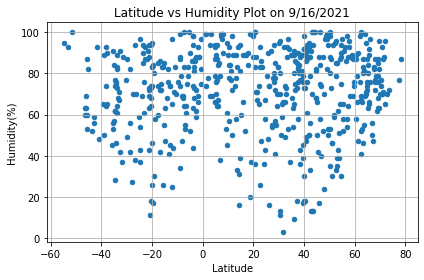

 Analisys: There is no visible pattern for this plot.


In [13]:
city_data.plot(kind="scatter",x="lat",y="humidity",grid="True")
plt.title("Latitude vs Humidity Plot on 9/16/2021")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.tight_layout()
plt.savefig("lat_vs_humidity.png")
plt.show()

print("\u001b[32m Analisys: There is no visible pattern for this plot.\u001b[0m")

## Latitude vs. Cloudiness Plot

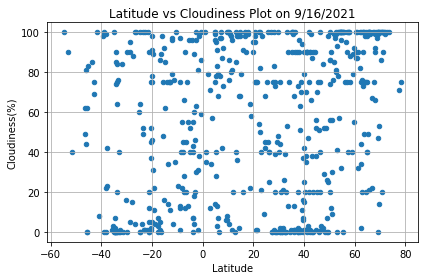

Analisys:There is no visible pattern for this plot.


In [14]:
city_data.plot(kind="scatter",x="lat",y="Cloudiness",grid="True")
plt.title("Latitude vs Cloudiness Plot on 9/16/2021")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.tight_layout()
plt.savefig("lat_vs_cloudiness.png")
plt.show()

print("\u001b[32mAnalisys:There is no visible pattern for this plot.\u001b[0m")

## Latitude vs. Wind Speed Plot

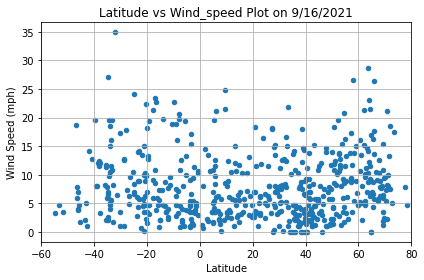

Analisys: There is no visible pattern for this plot.


In [15]:
city_data.plot(kind="scatter",x="lat",y="wind_speed",grid="True")
plt.title("Latitude vs Wind_speed Plot on 9/16/2021")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-60,80)
plt.tight_layout()
plt.savefig("lat_vs_windspeed.png")
plt.show()

print("\u001b[32mAnalisys: There is no visible pattern for this plot.\u001b[0m")

## Linear Regression

In [16]:
filt=city_data["lat"]>=0
city_data_north=city_data.loc[filt,:]

filt=city_data["lat"]<0
city_data_south=city_data.loc[filt,:]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

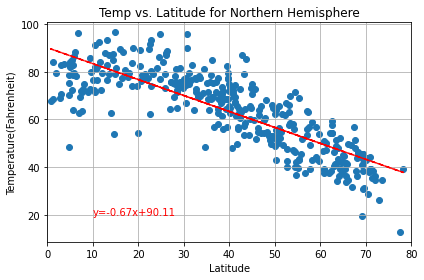

 Analisys: In northern hemisphere as we move further from equator towards pole temperature gradually decreases.


In [18]:
x_values=city_data_north["lat"].astype(float)
y_values=city_data_north["temperature"].astype(float)

(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(10,20),fontsize=10,color="red")
plt.grid(True)
plt.xlabel("Latitude")
plt.xlim(0,80)

plt.ylabel("Temperature(Fahrenheit)")
plt.title("Temp vs. Latitude for Northern Hemisphere")
plt.tight_layout()
plt.savefig("temp_lat_north.png")
plt.show()

print("\u001b[32m Analisys: In northern hemisphere as we move further from equator towards pole temperature gradually decreases.\u001b[0m")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

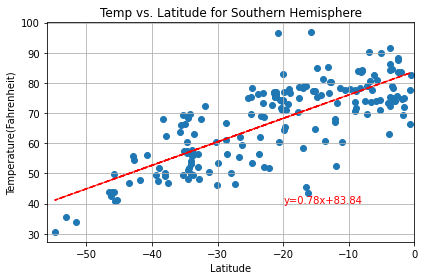

 Analisys: In sorthern hemisphere as we move further from equator towards pole temperature gradually decreases.


In [20]:
x_values=city_data_south["lat"].astype(float)
y_values=city_data_south["temperature"].astype(float)

(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(-20,40),fontsize=10,color="red")
plt.grid(True)
plt.xlim(-56,0)
plt.xlabel("Latitude")
plt.ylabel("Temperature(Fahrenheit)")
plt.title("Temp vs. Latitude for Southern Hemisphere")
plt.tight_layout()
plt.savefig("temp_lat_south.png")
plt.show()

print("\u001b[32m Analisys: In sorthern hemisphere as we move further from equator towards pole temperature gradually decreases.\u001b[0m")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

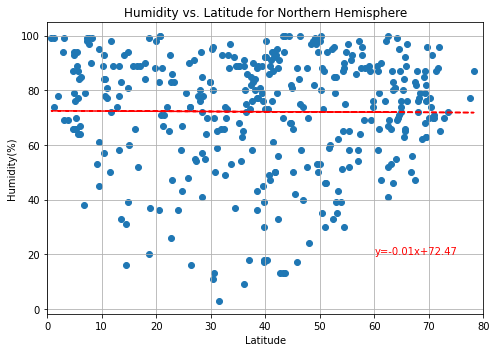

 Analisys:There is no visible relationship between humidity and latitude in northern hemisphere.
 Humidity varies on region basis and depends on geographic location and other weather factors.


In [21]:
x_values=city_data_north["lat"].astype(float)
y_values=city_data_north["humidity"].astype(float)

(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

plt.figure(figsize=(7,5))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(60,20),fontsize=10,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.xlim(0,80)
plt.grid(True)
plt.title("Humidity vs. Latitude for Northern Hemisphere")
plt.tight_layout()
plt.savefig("humidity_lat_north.png")
plt.show()

print("\u001b[32m Analisys:There is no visible relationship between humidity and latitude in northern hemisphere.\n Humidity varies on region basis and depends on geographic location and other weather factors.\u001b[0m")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

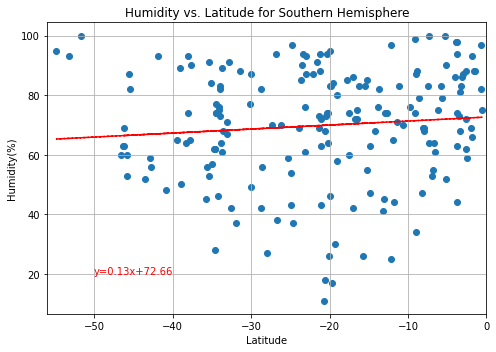

 Analisys:Although there is very little slope in regression line,there is no prominent relationship between 
 humidity and latitude in southern hemispere.Humidity varies on region basis and depends on geographic 
 location and other weather factors.


In [22]:
x_values=city_data_south["lat"].astype(float)
y_values=city_data_south["humidity"].astype(float)

(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

plt.figure(figsize=(7,5))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(-50,20),fontsize=10,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(True)
plt.xlim(-56,0)
plt.title("Humidity vs. Latitude for Southern Hemisphere")
plt.tight_layout()
plt.savefig("humidity_lat_south.png")
plt.show()

print("\u001b[32m Analisys:Although there is very little slope in regression line,there is no prominent relationship between \n humidity and latitude in southern hemispere.Humidity varies on region basis and depends on geographic \n location and other weather factors.\u001b[0m")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [1]:
x_values=city_data_north["lat"].astype(float)
y_values=city_data_north["Cloudiness"].astype(float)

(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

plt.figure(figsize=(7,5))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(60,10),fontsize=10,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(True)
plt.xlim(0,80)
plt.title("Cloudiness vs. Latitude for Northern Hemisphere")

plt.tight_layout()
plt.savefig("cloudiness_lat_north.png")
plt.show()

print("\u001b[32m Analisys:Slope of the regression line shows a slow change in\n percentage of cloudiness from equator to north pole.\u001b[0m")

NameError: name 'city_data_north' is not defined

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

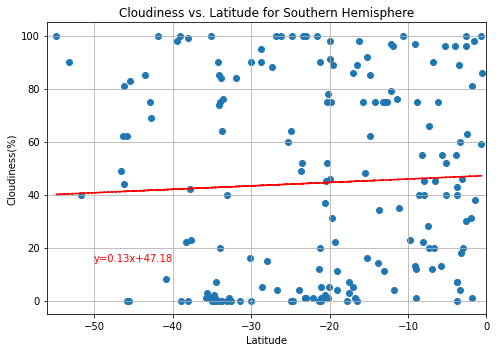

 Analisys:There is no visible relationship between cloudiness and latitude in southern hemisphere.
Cloudiness varies according to geographic location and other weather factors .


In [25]:
x_values=city_data_south["lat"].astype(float)
y_values=city_data_south["Cloudiness"].astype(float)

(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

plt.figure(figsize=(7,5))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(-50,15),fontsize=10,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(True)
plt.xlim(-56,0)
plt.title("Cloudiness vs. Latitude for Southern Hemisphere")
plt.tight_layout()
plt.savefig("cloudiness_lat_south.png")
plt.show()

print("\u001b[32m Analisys:There is no prominent change in cloudiness in southern hemisphere.\nCloudiness varies according to geographic location and other weather factors .\u001b[0m")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

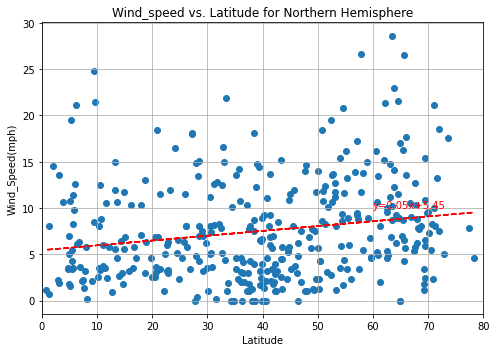

 Analisys:There is no visible relationship between windspeed and latitude in northern hemisphere.
 Windspeed varies according to geographic location.


In [26]:
x_values=city_data_north["lat"].astype(float)
y_values=city_data_north["wind_speed"].astype(float)

(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

plt.figure(figsize=(7,5))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(60,10),fontsize=10,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed(mph)")
plt.grid(True)
plt.xlim(0,80)
plt.title("Wind_speed vs. Latitude for Northern Hemisphere")
plt.tight_layout()
plt.savefig("windspeed_lat_north.png")
plt.show()

print("\u001b[32m Analisys:Regression line shows a slow increase in windspeed from equator to polar region in northern hemisphere.\n Windspeed varies according to geographic location.\u001b[0m")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

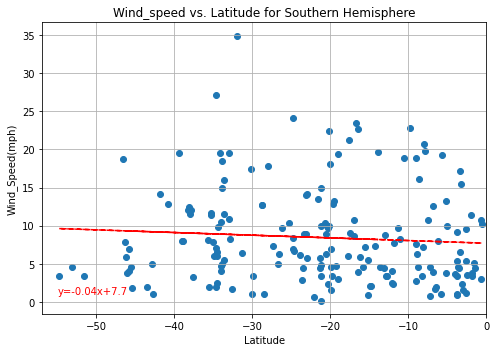

 Analisys: Although regression line has a very little slope,there is no prominent
 relationship between windspeed and latitude in sorthern hemisphere.
 Windspeed varies according to geographic location.


In [27]:
x_values=city_data_south["lat"].astype(float)
y_values=city_data_south["wind_speed"].astype(float)

(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

plt.figure(figsize=(7,5))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(-55,1),fontsize=10,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed(mph)")
plt.grid(True)
plt.xlim(-57,0)
plt.title("Wind_speed vs. Latitude for Southern Hemisphere")
plt.tight_layout()
plt.savefig("windspeed_lat_south.png")
plt.show()

print("\u001b[32m Analisys: Although regression line has a very little slope,there is no prominent\n relationship between windspeed and latitude in sorthern hemisphere.\n Windspeed varies according to geographic location.\u001b[0m")